In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/Users/a/Downloads/candy-data.csv")
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [46]:
df = df.drop("competitorname", axis=1)
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [47]:
X = df.drop("pricepercent",axis=1)
y = df["pricepercent"]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (11,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                768       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [50]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 0s 53ms/step - loss: 1.1674 - mae: 1.0088 - val_loss: 0.4760 - val_mae: 0.5989
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 0.4784 - mae: 0.6234 - val_loss: 0.2850 - val_mae: 0.4317
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.2711 - mae: 0.4490 - val_loss: 0.2020 - val_mae: 0.3517
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 0.1758 - mae: 0.3424 - val_loss: 0.1481 - val_mae: 0.3085
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.1088 - mae: 0.2512 - val_loss: 0.1206 - val_mae: 0.2857
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0774 - mae: 0.2065 - val_loss: 0.1074 - val_mae: 0.2701
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0599 - mae: 0.1812 - val_loss: 0.1030 - val_mae: 0.2650
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0551 - mae: 0.17

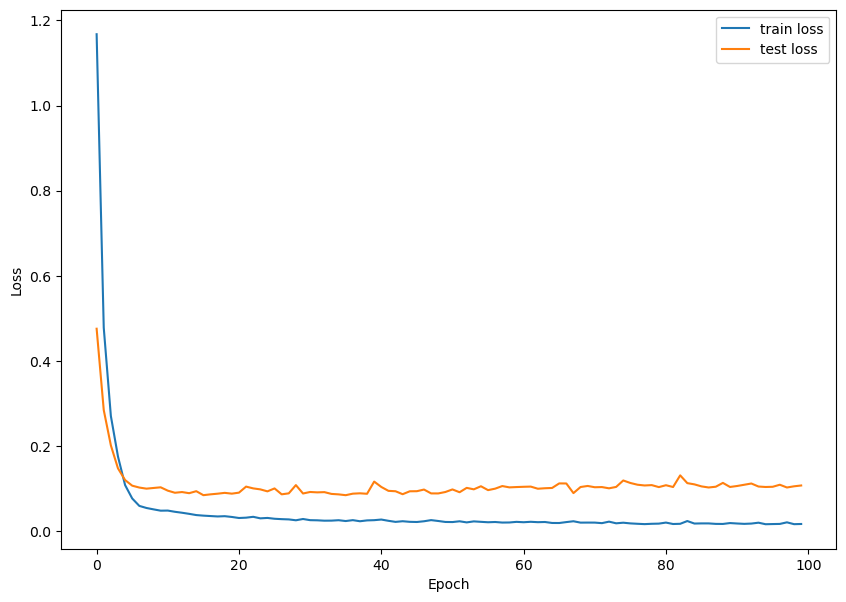

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

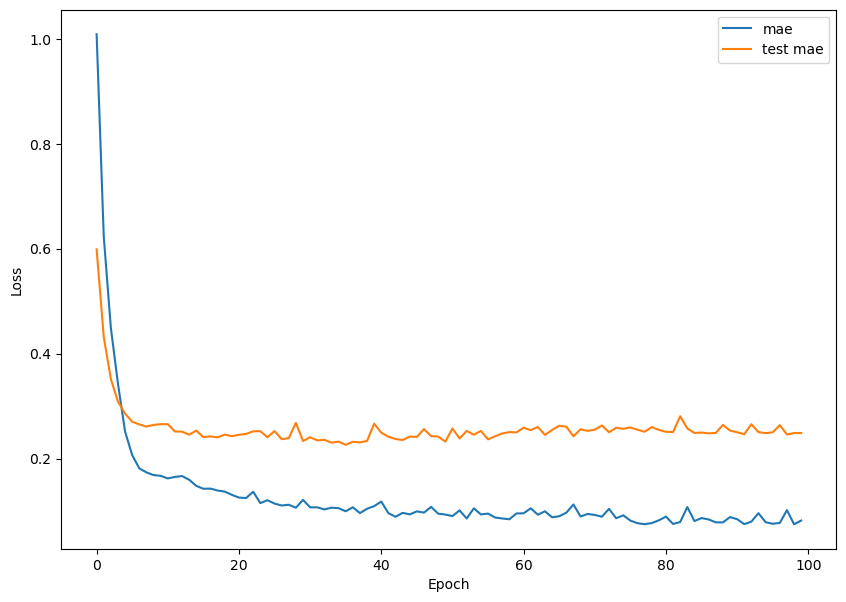

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.1079 - mae: 0.2487
